**Project on Anomaly Detection from the "HYPOTHYROIDISM DATASET"** - Unsupervised Learning

_A.Y. 2023-2024_

_Alessio De Luca [919790]_

_Camilla Tomasoni [915297]_

## 📚 Libraries  

In [ ]:
!pip install gower
!pip install kneed
!pip install plotly

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import os
from collections import Counter

# Visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# Scikit Learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors as knn

# Scipy libraries
from scipy.spatial.distance import pdist as pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

# Gower distance, KneeLocator and Kelbow libraries
import gower
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer

# Warnings libraries
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Download dataset ad csv file
from google.colab import files

## ✍ Data Loading - Preprocessing - Dataset Visualization

### Loading

In [ ]:
#Run this code if you want to run the code using Google Colab

# Google drive mount for colab
from google.colab import drive
drive.mount('/content/drive')

# Load the csv file
# Write your own path, make sure there is the "Unsupervised Learning 23-24 - Project Dataset.csv" in it.

path="/content/drive/MyDrive/Unsupervised/ProgettoFinale/"
#path="/content/drive/MyDrive/Unsupervised/"

df = pd.read_csv(path+"Unsupervised Learning 23-24 - Project Dataset.csv", sep=";")
#df = pd.read_csv(path+"Dataset UNSUP.csv", sep=";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Preprocessing

In [ ]:
# Drop useless columns
df = df.drop(columns = ["Row","Unnamed: 22","Unnamed: 23"])

# Shape of the dataset
N, M =np.shape(df)
print("The dataset has %d rows and %d features." %(N,M))

# Visualize the first 5 rows of the dataset
df.head(5)

The dataset has 7200 rows and 21 features.


Dim_0  Dim_1=0  Dim_2=0  Dim_3=0  Dim_4=0  Dim_5=0  Dim_6=0  Dim_7=0  \
0  0,750000        1        0        1        1        1        1        1   
1  0,239583        1        1        1        1        1        1        1   
2  0,479167        1        1        1        1        1        1        1   
3  0,656250        0        1        1        1        1        1        1   
4  0,229167        1        1        1        1        1        1        1   

   Dim_8=0  Dim_9=0  ...  Dim_11=0  Dim_12=0  Dim_13=0  Dim_14=0  Dim_15=0  \
0        0        1  ...         1         1         1         1         1   
1        1        1  ...         1         1         1         1         1   
2        1        1  ...         1         1         1         1         1   
3        1        1  ...         1         1         1         1         1   
4        1        1  ...         1         1         1         1         1   

     Dim_16    Dim_17    Dim_18    Dim_19    Dim_20  
0  0,001132  0,080780  0,197324  0,300926  0,225000  
1  0,000472  0,164345  0,235786  0,537037  0,165625  
2  0,003585  0,130919  0,167224  0,527778  0,118750  
3  0,001698  0,091922  0,125418  0,337963  0,129688  
4  0,000472  0,142061  0,229097  0,337963  0,235938  

[5 rows x 21 columns]

In [ ]:
# Check for Na
df.isnull().any()

Dim_0       False
Dim_1=0     False
Dim_2=0     False
Dim_3=0     False
Dim_4=0     False
Dim_5=0     False
Dim_6=0     False
Dim_7=0     False
Dim_8=0     False
Dim_9=0     False
Dim_10=0    False
Dim_11=0    False
Dim_12=0    False
Dim_13=0    False
Dim_14=0    False
Dim_15=0    False
Dim_16      False
Dim_17      False
Dim_18      False
Dim_19      False
Dim_20      False
dtype: bool

In [ ]:
# Check for duplicates
print(f"Duplicates in the dataframe: {df.duplicated().sum()}")

Duplicates in the dataframe: 71


In [ ]:
# Visualize the duplicated rows
# There are only 71 duplicates and the dataset doesn't contain an object identifier column, therefore we decided not to remove them
# as we can't know if they are errors or not.

duplicates_df=pd.DataFrame(df[df.duplicated()].value_counts())
duplicates_df.head(5)

count
Dim_0    Dim_1=0 Dim_2=0 Dim_3=0 Dim_4=0 Dim_5=0 Dim_6=0 Dim_7=0 Dim_8=0 Dim_9=0 Dim_10=0 Dim_11=0 Dim_12=0 Dim_13=0 Dim_14=0 Dim_15=0 Dim_16   Dim_17   Dim_18   Dim_19   Dim_20         
0,260417 1       1       1       1       1       1       1       1       1       1        1        1        1        1        1        0,003566 0,111978 0,182575 0,379630 0,171984      5
0,333333 1       1       1       1       1       1       1       1       1       1        1        1        1        1        1        0,003566 0,111978 0,182575 0,379630 0,171984      4
0,416667 1       1       1       1       1       1       1       1       1       1        1        1        1        1        1        0,003566 0,111978 0,182575 0,379630 0,171984      3
0,583333 1       1       1       1       1       1       1       1       1       1        1        1        1        1        1        0,003566 0,111978 0,182575 0,379630 0,171984      3
0,395833 1       1       1       1       1       1       1       1       1       1        1        1        1        1        1        0,004377 0,109192 0,186104 0,365741 0,180875      3

In [ ]:
# Check dtypes
df.dtypes

Dim_0       object
Dim_1=0      int64
Dim_2=0      int64
Dim_3=0      int64
Dim_4=0      int64
Dim_5=0      int64
Dim_6=0      int64
Dim_7=0      int64
Dim_8=0      int64
Dim_9=0      int64
Dim_10=0     int64
Dim_11=0     int64
Dim_12=0     int64
Dim_13=0     int64
Dim_14=0     int64
Dim_15=0     int64
Dim_16      object
Dim_17      object
Dim_18      object
Dim_19      object
Dim_20      object
dtype: object

In [ ]:
# Note: run this cell only once

# Filter continuous and binary variables
# Select columns with object data type
object_cols = df.select_dtypes(include=['object'])

# Select columns with integer data type
int_cols = df.select_dtypes(include=['int64'])

# Replace commas with dots and convert object columns to float
object_cols = object_cols.apply(lambda col: col.str.replace(',', '.')).astype(float)

# Convert integer columns to boolean
int_cols = int_cols.astype(bool)

# Combine the modified columns back into a single DataFrame
df = pd.concat([object_cols, int_cols], axis=1)

### Dataset visualization

In [ ]:
# Observe some statistics about the continous features
df.describe()

Dim_0       Dim_16       Dim_17       Dim_18       Dim_19  \
count  7200.000000  7200.000000  7200.000000  7200.000000  7200.000000   
mean      0.531790     0.009172     0.108506     0.179649     0.374250   
std       0.197156     0.043357     0.042001     0.060148     0.088354   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.375000     0.001340     0.091922     0.145485     0.324074   
50%       0.562500     0.003208     0.109192     0.175585     0.370370   
75%       0.687500     0.005094     0.119777     0.205686     0.402778   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Dim_20  
count  7200.000000  
mean      0.173773  
std       0.056402  
min       0.000000  
25%       0.145312  
50%       0.170313  
75%       0.195313  
max       1.000000

In [ ]:
# Visualize the datase
print("The dataset has %d columns representing a continuous attribute with values in [0,1],\
 and %d columns representing a boolean attribute whose value is True or False.\n" %((object_cols.shape[1]),(int_cols.shape[1])))
df.head(5)

The dataset has 6 columns representing a continuous attribute with values in [0,1], and 15 columns representing a boolean attribute whose value is True or False.



Dim_0    Dim_16    Dim_17    Dim_18    Dim_19    Dim_20  Dim_1=0  \
0  0.750000  0.001132  0.080780  0.197324  0.300926  0.225000     True   
1  0.239583  0.000472  0.164345  0.235786  0.537037  0.165625     True   
2  0.479167  0.003585  0.130919  0.167224  0.527778  0.118750     True   
3  0.656250  0.001698  0.091922  0.125418  0.337963  0.129688    False   
4  0.229167  0.000472  0.142061  0.229097  0.337963  0.235938     True   

   Dim_2=0  Dim_3=0  Dim_4=0  ...  Dim_6=0  Dim_7=0  Dim_8=0  Dim_9=0  \
0    False     True     True  ...     True     True    False     True   
1     True     True     True  ...     True     True     True     True   
2     True     True     True  ...     True     True     True     True   
3     True     True     True  ...     True     True     True     True   
4     True     True     True  ...     True     True     True     True   

   Dim_10=0  Dim_11=0  Dim_12=0  Dim_13=0  Dim_14=0  Dim_15=0  
0      True      True      True      True      True      True  
1      True      True      True      True      True      True  
2      True      True      True      True      True      True  
3      True      True      True      True      True      True  
4      True      True      True      True      True      True  

[5 rows x 21 columns]

<Figure size 500x400 with 0 Axes>

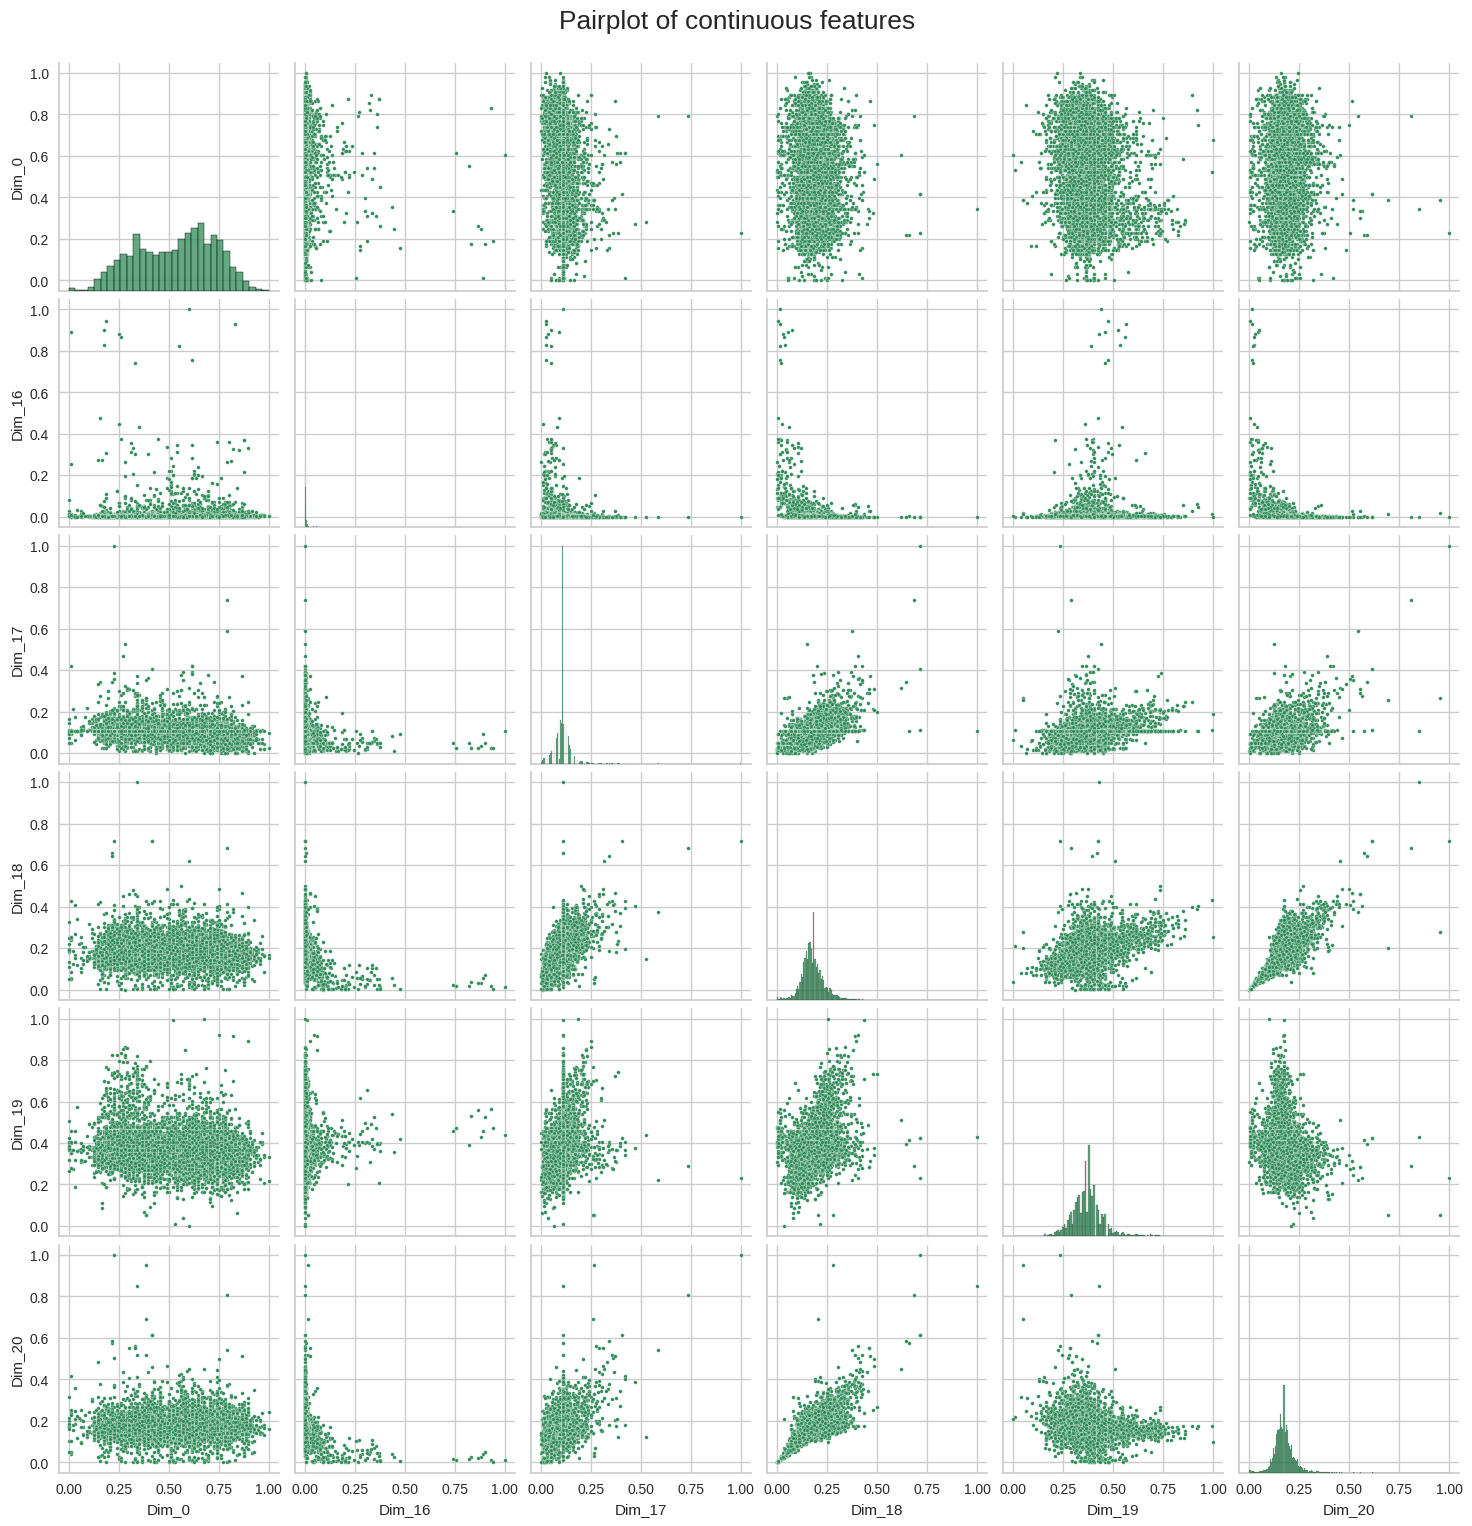

In [ ]:
# Histograms and scatterplots of the continuous features

# Pairplot
plt.figure(figsize=(5,4))
sns.pairplot(object_cols, plot_kws={'s': 7, 'color':'seagreen'}, diag_kws={'color':'seagreen'})
    # 's' specifies the size of the point markers in the scatterplots
    # additional parameters kws to specify the color of the scatterplots and the diagonal plots
plt.suptitle('Pairplot of continuous features', fontsize=19, y = 1.02)
plt.show()

In the above pairplot we can observe that most of the distributions are not centered in the middle value, but the elements (in the range [0,1]) tend to assume values between 0 and 0.5. This could signify that the highest values may correspond to anomalies.

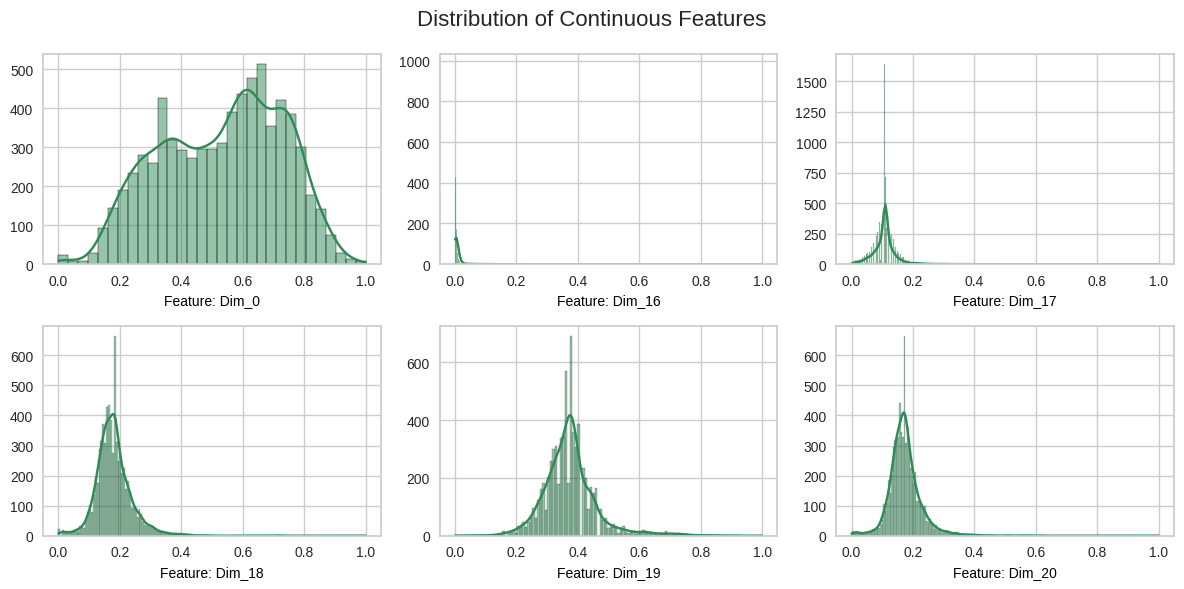

In [ ]:
# Distribution plot of the continuous features
def DistPlot(data, column, ax):
    sns.histplot(data[column], kde=True, color='seagreen', ax=ax)
    plt.suptitle('Distribution of Continuous Features', fontsize=16)
    ax.set_ylabel(None)
    ax.set_xlabel(f'Feature: {column}', fontsize=10, color='black')
numerical_columns = object_cols.columns

# Create a 2x3 grid for the subplots
fig, axs = plt.subplots(2, 3, figsize=(12,6))

# Flatten the axs array to facilitate the iteration of the subplots
axs = axs.flatten()

# Iterate through the column numbers and the axs values
for i, numerical_column in enumerate(numerical_columns):
    DistPlot(df, numerical_column, axs[i])

plt.tight_layout()
#plt.savefig("Univ_distributions.png", bbox_inches='tight')
plt.show()

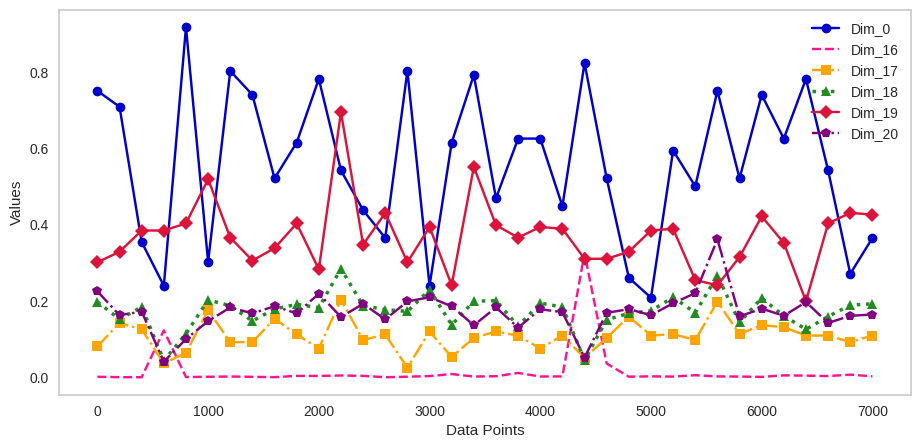

In [ ]:
# Visualization of continuous features every 200 samples

# Indiced every 200
indices = np.arange(0, N, step=200)

# Plot
plt.figure(figsize=(11,5), dpi=100)
plt.plot(df["Dim_0"].iloc[indices], color='mediumblue', marker="o", linestyle="-", label='Dim_0')  # Blue
plt.plot(df["Dim_16"].iloc[indices], color='deeppink', marker="x", linestyle="--", label='Dim_16')  # Orange
plt.plot(df["Dim_17"].iloc[indices], color='orange', marker="s", linestyle="-.", label='Dim_17')  # Green
plt.plot(df["Dim_18"].iloc[indices], color='forestgreen', marker="^", linestyle=":", label='Dim_18', linewidth=2.5)  # Red
plt.plot(df["Dim_19"].iloc[indices], color='crimson', marker="D", linestyle="-", label='Dim_19')  # Purple
plt.plot(df["Dim_20"].iloc[indices], color='purple', marker="p", linestyle="-.", label='Dim_20')  # Brown
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid()
#plt.savefig("Visual_contfeat.png")
plt.show()

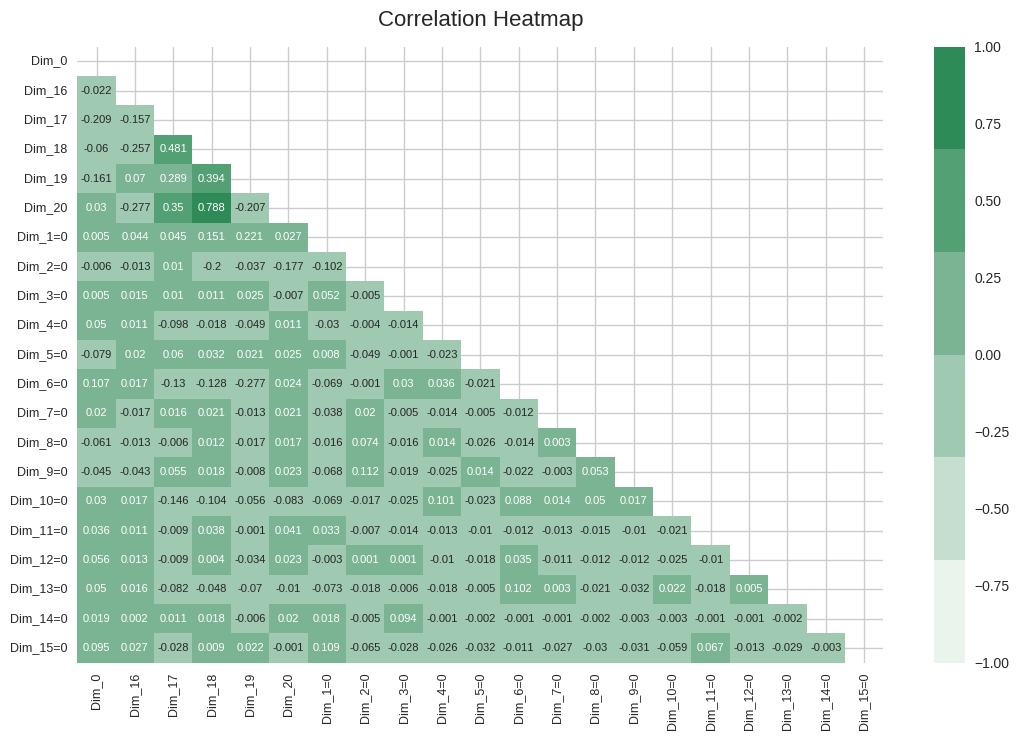

In [ ]:
# Correlation matrix of the whole dataset

plt.figure(figsize=(13,8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype='bool'))
cmap = sns.light_palette("seagreen")
heatmap = sns.heatmap(round(df.corr(),3), mask=mask, vmin=-1, vmax=1, annot=True, fmt=".3g", annot_kws={"size":8},cmap=cmap)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('Correlation Heatmap', fontsize=16, y=1.02)
#plt.savefig("Correlation_heatmap.png")
plt.show()

Dimensions 18 and 20 are much more correlated than the others (0.788), meaning that one of the two dimensions could eventually be removed.
We decided to keep them both anyway since the correlation value is not so high.

### Distance definition

Since we have both float and boolean variables, we must use a distance measure that takes into account the different variable types. For this reason we used the Gower distance measure.

In [ ]:
gower_matrix_path = path + "gower_distance_matrix.npy" # Load the matrix if already saved in Drive

# If not saved, function to calculate the Gower distance matrix is the following
if not os.path.exists(gower_matrix_path):
  gower_distance_matrix = gower.gower_matrix(df)
  np.save(gower_matrix_path, gower_distance_matrix)
else:
  gower_distance_matrix = np.load(gower_matrix_path)

In [ ]:
# Round to 4 decimals and visualize
gower_distance_matrix = gower_distance_matrix.round(4)
print(gower_distance_matrix)

[[0.     0.1395 0.1279 ... 0.1617 0.1705 0.1532]
 [0.1395 0.     0.0191 ... 0.0844 0.0704 0.0903]
 [0.1279 0.0191 0.     ... 0.07   0.0666 0.0733]
 ...
 [0.1617 0.0844 0.07   ... 0.     0.1107 0.02  ]
 [0.1705 0.0704 0.0666 ... 0.1107 0.     0.116 ]
 [0.1532 0.0903 0.0733 ... 0.02   0.116  0.    ]]


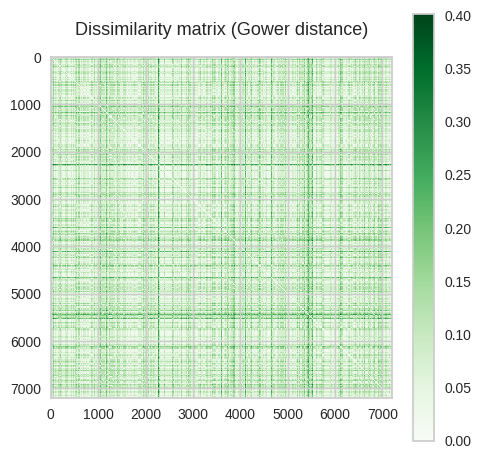

In [ ]:
# Visualization of the Gower distance matrix
plt.matshow(gower_distance_matrix.round(3), cmap='Greens')
plt.title('Dissimilarity matrix (Gower distance)', y=1.04, fontsize=13)
plt.tick_params(labelbottom=True, labeltop=False)
plt.colorbar()
plt.show()

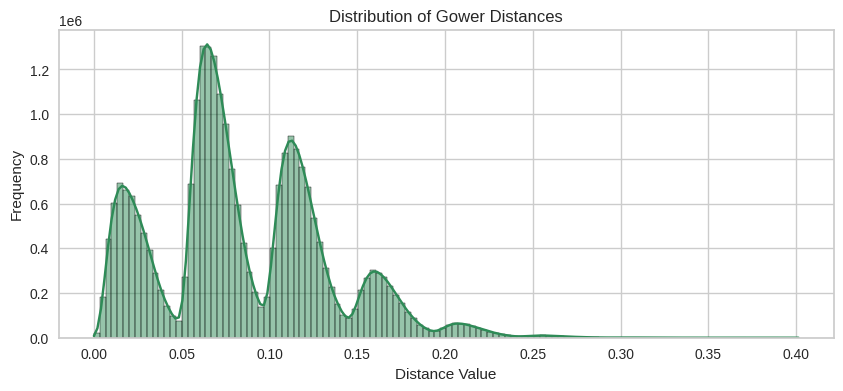

In [ ]:
# Plot of the frequency of the distance values, between 0.0 and 0.40
# Since the matrix is symmetric and 0 in the diagonal (distance of an element with itself is 0), we keep only the upper triangle
distance_plot = gower_distance_matrix[np.triu_indices_from(gower_distance_matrix, k=1)]

# Plot the distribution
plt.figure(figsize=(10, 4))
sns.histplot(distance_plot, bins=120, kde=True, color='seagreen')
plt.title('Distribution of Gower Distances')
plt.xlabel('Distance Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## 📋 Functions Definition

### Plotting functions

In [ ]:
color = 'lightgreen'

# Plot the cumulative explained variance
def PlotExplainedVariance(kept_variance):
    # 'kept variance' argument specifies the percentage of the variance that we want to mantain in the new dataset, must be in [0,1]

  # Perform PCA on the original dataset
  pca = PCA().fit(df)

  # Plot the cumulative explained variance and the horizontal line at the values specified by 'kept variance'
  plt.figure(figsize=(8,3))
  plt.plot(range(1,22), pca.explained_variance_ratio_.cumsum(), marker='o', color='seagreen')
  plt.xticks(np.arange(1,22))
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.axhline(y=kept_variance, color='r', linestyle='--', linewidth=1.4)

  # Find the intersection point between the variance curve and the 'kept variance' horizontal line
  x_data = np.arange(1,22)
  y_data = pca.explained_variance_ratio_.cumsum()
  idx = np.where((y_data-kept_variance).round(2)>=0)[0][0]  # Number of kept components is rounded to the excess

  # Save the x coordinate of the intersection point
  kept_dimensions = (x_data[idx])   # It represents the number of components that guarantees the specified percentage of variance

  # Draw the line corresponding to the kept number of components
  plt.axvline(x=kept_dimensions, color='blue', linestyle='--', linewidth=1.5)
  plt.title('Explained Variance', fontsize=14, y=1.02)
  plt.grid(True)
  plt.show()


# Anomalies visualization: blue and red points plot
# This function plots the anomaly scores for each data point (not sorted) and colored points identify the anomalies
def AnomalyPoints(anom_score, anomaly_idxs_knee, anomaly_idxs_perc):
  plt.figure(figsize=(12,4))
  plt.plot(anom_score, linewidth=0.5, color='seagreen')
  plt.xlabel('Data points', fontsize=12)
  plt.xticks(np.arange(0, N+1, step=600))
  plt.ylabel('Anomaly scores/distances', fontsize=12)
  plt.grid(True)
  only_perc = list(set(anomaly_idxs_perc) - set(anomaly_idxs_knee))
  plt.scatter(anomaly_idxs_knee, anom_score[anomaly_idxs_knee], color='blue', s=8)
  plt.scatter(only_perc, anom_score[only_perc], color='red', s=8)
  plt.title('Anomaly points visualization', fontsize=13, y=1.02)
  plt.show()


# Anomalies visualization: histogram and anomaly scores for sorted data points
def ShowAnomalies(N, sorted_scores, anomaly_thresholds, algorithm):
    fig = plt.figure(figsize=(13, 4))

    # First plot: histogram
    ax1 = fig.add_subplot(121)
    ax1.hist(sorted_scores, bins=150, weights=np.ones_like(sorted_scores) / len(sorted_scores), color='seagreen')
    ax1.set_xlabel(f'{algorithm} Anomaly scores', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.grid(True)

    # Second plot: line plot (anomaly scores plot)
    ax2 = fig.add_subplot(122)
    ax2.plot(sorted_scores, '-o', color='seagreen', markersize=2, linewidth=0.5)
    ax2.set_xlabel('Sorted data points', fontsize=12)
    ax2.set_ylabel(f'{algorithm} Anomaly scores', fontsize=12)

    for i, th in enumerate(anomaly_thresholds):
      x = np.argmax(sorted_scores >= th)
      labels=['95° percentile', 'KneeLocator']
      ax2.axvline(x=x, color=['r','blue'][i], linestyle='dashed', label=f'{labels[i]} = {th.round(4)}')

    ax2.legend(fontsize=10)
    ax2.grid(True)
    fig.suptitle("Anomaly scores visualization", fontsize=14)
    plt.legend(fontsize=10)
    plt.show()

# Function to calculate the overlapping percentage between the 2 radial plots, used in the "AnomalyRadialPlots" function
def calculate_iou(normal_means, anomaly_means):
    # Calcolare l'area di intersezione
    intersection_area = 0
    for i in range(len(normal_means)):
        intersection_area += min(normal_means[i], anomaly_means[i])

    # Calcolare l'area di unione
    union_area = np.sum(normal_means) + np.sum(anomaly_means) - intersection_area

    # Calcolare IoU
    iou = intersection_area / union_area
    return iou

# Radial plots of the features
# It shows the mean values for 5 features, of the anomaly data points and the normal data points
# It allows to visualize in which dimensions the anomalies and the normal points differ the most
def AnomalyRadialPlots(df, anomaly_idxs, features):
    labels = np.ones(df.shape[0])
    labels[np.array(anomaly_idxs)] = -1
    df_labels = df.copy()
    df_labels['labels'] = np.where(labels == 1, 'Normal', 'Anomaly') # Each points gets only one label, avoids glitches

    # Extract categories (plotted dimensions) and means (value to plot)
    categories = [df_labels.columns[i] for i in features]
    normal_means = df[df_labels['labels'] == 'Normal'][categories].mean().values
    anomaly_means = df[df_labels['labels'] == 'Anomaly'][categories].mean().values

    fig = plt.figure(figsize=(13, 4))

    # Radial plot for normal data points
    ax1 = fig.add_subplot(131, polar=True)
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    normal_means = np.concatenate((normal_means, [normal_means[0]]))
    ax1.plot(angles, normal_means, 'o-', linewidth=2, label='Normal', color=color)
    ax1.fill(angles, normal_means, alpha=0.25, color = color)
    ax1.set_yticklabels([])
    ax1.set_xticks(angles[:-1])
    ax1.set_xticklabels(categories)
    ax1.set_title('Radial Plot of Features for Non-Anomalies', fontsize= 12)
    ax1.legend(loc='best', bbox_to_anchor=(-0.05, 0.5, 0.3, 0.3))
    # Adding mean values to the plot points for normal data
    offset=0.05
    for angle, value in zip(angles, normal_means):
      ax1.text(angle, value + offset, f'{value:.3f}', ha='center', va='bottom', fontsize=10, color='black')

    # Radial plot for anomalies
    ax2 = fig.add_subplot(132, polar=True)
    anomaly_means = np.concatenate((anomaly_means, [anomaly_means[0]]))
    ax2.plot(angles, anomaly_means, 'o-', linewidth=2, label='Anomaly', color='purple')
    ax2.fill(angles, anomaly_means, color='m' ,alpha=0.25)
    ax2.set_yticklabels([])
    ax2.set_xticks(angles[:-1])
    ax2.set_xticklabels(categories)
    ax2.set_title('Radial Plot of Features for Anomalies', fontsize=12)
    ax2.legend(loc='best', bbox_to_anchor=(-0.05, 0.5, 0.3, 0.3))
    # Adding mean values to the plot points for anomalies
    offset=0.06
    for angle, value in zip(angles, anomaly_means):
      ax2.text(angle, value + offset, f'{value:.3f}', ha='center', va='bottom', fontsize=10, color='black')

    # Radial plot for both data combined
    ax3 = fig.add_subplot(133, polar=True)
    ax3.plot(angles, normal_means, 'o-', linewidth=2, label='Normal', color=color)
    ax3.fill(angles, normal_means, color= color, alpha=0.25)
    ax3.plot(angles, anomaly_means, 'o-', linewidth=2, label='Anomaly', color='purple')
    ax3.fill(angles, anomaly_means, color='m', alpha=0.25)
    ax3.set_yticklabels([])
    ax3.set_xticks(angles[:-1])
    ax3.set_xticklabels(categories)
    ax3.set_title('Radial Plot of Features for Anomalies and Non-Anomalies', fontsize=12)
    ax3.legend(loc='best', bbox_to_anchor=(-0.05, 0.5, 0.3, 0.3))

    # Obtain overlal percentage
    overlap_percentage = calculate_iou(normal_means, anomaly_means)*100
    ax3.text(0.5, -0.1, f'Overlap Percentage: {overlap_percentage:.2f}%', transform=ax3.transAxes, ha='center')

    # Adjust space between subplots
    plt.subplots_adjust(wspace=0.8)
    plt.tight_layout()
    plt.show()

#### Scatterplots

In [ ]:
# Scatterplot and t-SNE 2D
def AnomalyScatterplots(df, N, anomaly_idxs, feats):

  labels2use = np.ones(N)
  labels2use[list(anomaly_idxs)] = -1
  df_labels = df.copy()
  df_labels['labels'] = np.where(labels2use == 1, 'Normal', 'Anomaly')

  fig = plt.figure(figsize=(14,4))

  # Scatterplot
  ax1 = fig.add_subplot(121)
  sns.scatterplot(ax=ax1, x=df_labels.iloc[:, feats[0]], y=df_labels.iloc[:, feats[1]], hue=df_labels['labels'], palette={'Normal': 'lightgreen', 'Anomaly': 'purple'})
  ax1.set_title(f'Scatter Plot of Feature {df.columns[feats[0]]} and Feature {df.columns[feats[1]]}')
  ax1.set_xlabel(f'Feature {df.columns[feats[0]]}')
  ax1.set_ylabel(f'Feature {df.columns[feats[0]]}')
  ax1.legend()
  ax1.grid(True)


  # t-SNE 2D plot
  # Define colors for the scatter plot
  colors = {'Normal': 'lightgreen', 'Anomaly': 'purple'}

  # Run t-SNE with 2 components for 2D plot
  tsne2d = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
  tsne2d_results = tsne2d.fit_transform(df)

  # Calculate the KL divergence
  kl_divergence = tsne2d.kl_divergence_

  # Create a DataFrame with t-SNE results
  tsne2d_df = pd.DataFrame(tsne2d_results, columns=['Dim1', 'Dim2'])
  tsne2d_df['labels'] = df_labels['labels']

  ax2 = fig.add_subplot(122)
  sns.scatterplot(ax=ax2, x=tsne2d_df['Dim1'], y=tsne2d_df['Dim2'], hue=tsne2d_df['labels'], palette=colors)
  ax2.set_title('2D t-SNE Visualization')
  ax2.set_xlabel('Dimension 1')
  ax2.set_ylabel('Dimension 2')
  ax2.legend()
  ax2.grid(True)

  # Show the Kl divergence in the plot
  plt.text(0.5, 0.02, f'KL Divergence: {kl_divergence:.2f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

  fig.suptitle("Anomaly Visualization")
  plt.show()


def TSNE3Dscatter_static(df, N, anomaly_idxs):
    # Set the labels
    labels2use = np.ones(N)
    labels2use[list(anomaly_idxs)] = -1
    df_labels = df.copy()
    df_labels['labels'] = np.where(labels2use == 1, 'Normal', 'Anomaly')

    # Remove the 'labels' column before computing t-SNE transformation
    df_tsne3d = df_labels.drop(columns=['labels'])

    # Define colors for the scatter plot
    colors = {'Normal': 'lightgreen', 'Anomaly': 'purple'}

    # Run t-SNE with 3 components for 3D plot
    tsne3d = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
    tsne3d_results = tsne3d.fit_transform(df_tsne3d)

    # Calculate the KL divergence
    kl_divergence = tsne3d.kl_divergence_

    # Create a DataFrame with t-SNE results
    tsne3d_df = pd.DataFrame(tsne3d_results, columns=['Dim1', 'Dim2', 'Dim3'])
    tsne3d_df['labels'] = df_labels['labels']

    # Create the 3D scatter plot using Matplotlib
    fig = plt.figure(figsize=(9, 4))
    ax = fig.add_subplot(111, projection='3d')

    for label in tsne3d_df['labels'].unique():
        indices = tsne3d_df['labels'] == label
        ax.scatter(tsne3d_df.loc[indices, 'Dim1'],
                   tsne3d_df.loc[indices, 'Dim2'],
                   tsne3d_df.loc[indices, 'Dim3'],
                   c=colors[label], label=label, s=50, alpha=0.6)

    ax.set_title('3D t-SNE Visualization')
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.legend()

    # Add KL divergence as text on the plot
    plt.figtext(0.5, 0.01, f'KL divergence={kl_divergence:.2f}', wrap=True, horizontalalignment='center', fontsize=12)

    # Save the plot as an image file
    plt.show()


def TSNE3Dscatter(df, N, anomaly_idxs):
    # Set the labels
    labels2use = np.ones(N)
    labels2use[list(anomaly_idxs)] = -1
    df_labels = df.copy()
    df_labels['labels'] = np.where(labels2use == 1, 'Normal', 'Anomaly')

    # Remove the 'labels' column before computing t-SNE transformation
    df_tsne3d = df_labels.drop(columns=['labels'])

    # Define colors for the scatter plot
    colors = {'Normal': 'lightgreen', 'Anomaly': 'purple'}

    # Run t-SNE with 3 components for 3D plot
    tsne3d = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
    tsne3d_results = tsne3d.fit_transform(df_tsne3d)

      # Calculate the KL divergence
    kl_divergence = tsne3d.kl_divergence_

    # Create a DataFrame with t-SNE results
    tsne3d_df = pd.DataFrame(tsne3d_results, columns=['Dim1', 'Dim2', 'Dim3'])
    tsne3d_df['labels'] = df_labels['labels']

    # Create the 3D scatter plot using plotly
    fig = px.scatter_3d(
        tsne3d_df, x='Dim1', y='Dim2', z='Dim3',
        color='labels', color_discrete_map=colors,
        title='3D t-SNE Visualization'
    )
    fig.update_layout(scene=dict(
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        zaxis_title='Dimension 3'
    ))
        # Add a text annotation with the KL divergence value
    fig.add_annotation(
        x=0.5, y=-0.1, xref='paper', yref='paper',
        text=f'KL divergence={kl_divergence:.2f}', showarrow=False
    )

    fig.show()

### Anomaly detection functions

In [ ]:
# Function for the COF algorithm
def COF(dist_matrix, N, num_neigh):
  '''
  simplified version that doesn't consider differents weight for closer neighborhoods
  '''

  # KNN indices array (difference with the previously computed indices is that this removes the first column (self))
  knn_indices = np.zeros((N, num_neigh), dtype=int)
  for i in range(N):
      knn_indices[i] = np.argsort(dist_matrix[i])[1:num_neigh + 1]

  # Function that computes average chaining distances for an index
  def average_chaining_distance(indices):
      r = len(indices)
      distances = [dist_matrix[indices[i], indices[i+1]] for i in range(r-1)]
      return np.sum(2 * (r - np.arange(1, r)) * distances) / (r * (r - 1))

  ac_distances = np.zeros(N)
  for i in range(N):
      knn_i = knn_indices[i]
      ac_distances[i] = average_chaining_distance(knn_i)

  # Compute COF
  cof_scores = np.zeros(N)
  for i in range(N):
      knn_i = knn_indices[i]
      knn_ac_distances = ac_distances[knn_i]
      cof_scores[i] = ac_distances[i] / (np.mean(knn_ac_distances) + 1e-10)  # adding a small value to avoid division by zero

  return cof_scores

## 🔍  Anomaly Detection Techniques

### COF

COF anomaly scores sample: [0.76880746 0.76880746 0.76880746 ... 4.85679895 4.95687821 5.13374004]
# of anomalies in the top 5%: 360
# of anomalies detected with KneeLocator: 210


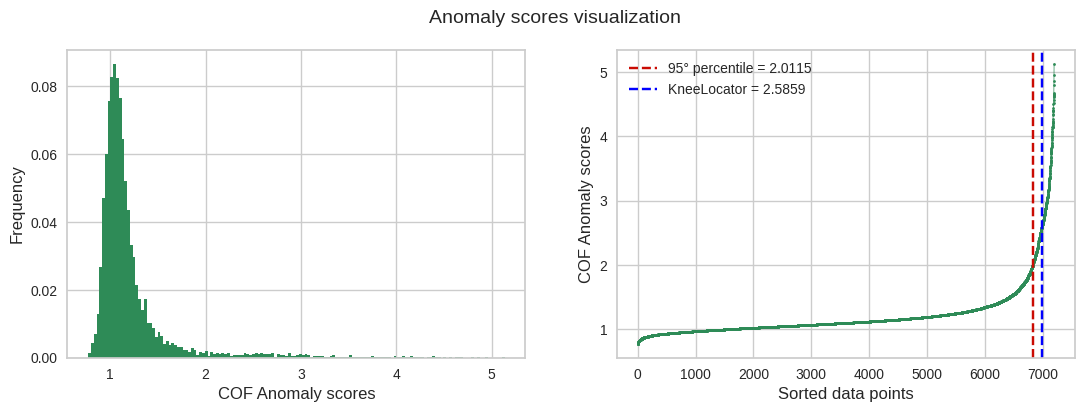

In [ ]:
num_neighbors = int(np.sqrt(N))   # Definition of number of neighbors to consider, rule of thumb suggests using √n
# Compute COF
cof_scores = COF(gower_distance_matrix, N, num_neighbors)    # Function COF defined in "Functions Definition" section

# Sort and identify anomalies using percentiles and KneeLocator
idxs = np.arange(N).tolist()
combined = list(zip(cof_scores, idxs))
sorted_anomalies = sorted(combined, key=lambda x: x[0])
sorted_scores_COF, sorted_idxs_COF = zip(*sorted_anomalies)

# Identify anomalies using percentiles, the worst 5% is considered anomaly
threshold_perc_COF = np.percentile(sorted_scores_COF, 95).astype("float64")

# Identify anomalies using KneeLocator
S = 1  # Sensitivity parameter for knee locator
kneedle = KneeLocator(range(N), sorted_scores_COF, S=S, curve='convex', direction='increasing')
knee_point = kneedle.elbow
threshold_knee_COF = sorted_scores_COF[knee_point].astype("float64")

# Saving anomalies
anomalies_perc_COF = np.where(sorted_scores_COF > threshold_perc_COF)[0]
anomalies_knee_COF = np.where(sorted_scores_COF > threshold_knee_COF)[0]

anomalies_idxs_perc_COF = sorted_idxs_COF[-len(anomalies_perc_COF):]
anomalies_idxs_knee_COF = sorted_idxs_COF[-len(anomalies_knee_COF):]

# Print results
print("COF anomaly scores sample:", np.array(sorted_scores_COF))
print("# of anomalies in the top 5%:", len(anomalies_perc_COF))
print("# of anomalies detected with KneeLocator:", len(anomalies_knee_COF))

# Plot anomaly scores frequency, and anomaly scores for sorted data points
ShowAnomalies(N, sorted_scores_COF, anomaly_thresholds=[threshold_perc_COF, threshold_knee_COF], algorithm='COF')

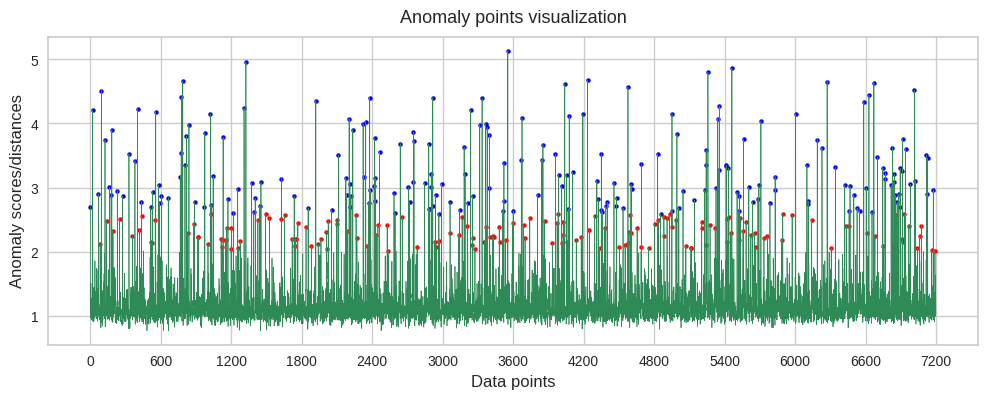

In [ ]:
# Anomalies visualization: blue points correspond to the anomalies identified by the Knee Locator,
# blue + red points = top 5% anomalies
AnomalyPoints(cof_scores, np.array(anomalies_idxs_knee_COF), anomalies_idxs_perc_COF)

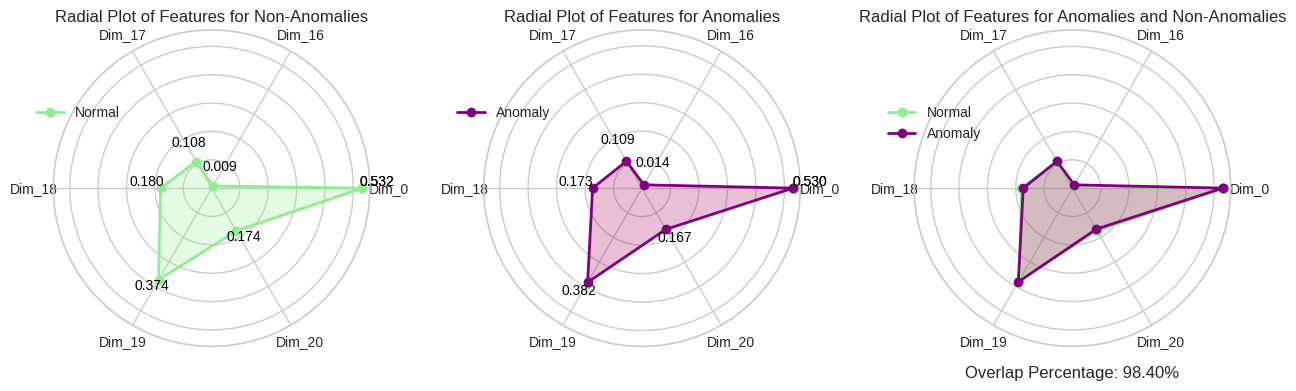

In [ ]:
AnomalyRadialPlots(df, anomalies_idxs_knee_COF, features=[0, 1, 2, 3, 4, 5])

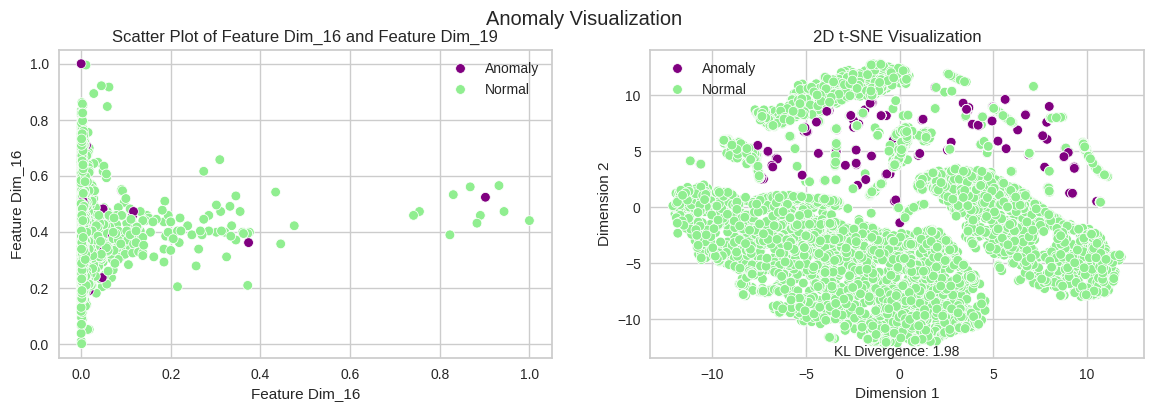

In [ ]:
AnomalyScatterplots(df, N, anomalies_idxs_knee_COF, feats=[1,4])

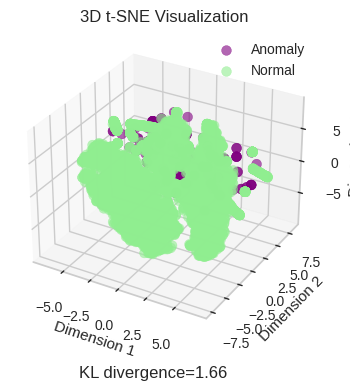

In [ ]:
TSNE3Dscatter_static(df, N, anomalies_idxs_knee_COF)

In [ ]:
TSNE3Dscatter(df, N, anomalies_idxs_knee_COF)

In [ ]:
# Save variables for later comparison graph
COF_perc = np.zeros(7200)
COF_perc[list(anomalies_idxs_perc_COF)]=-1

COF_knee = np.zeros(7200)
COF_knee[list(anomalies_idxs_knee_COF)]=-1

### PCA

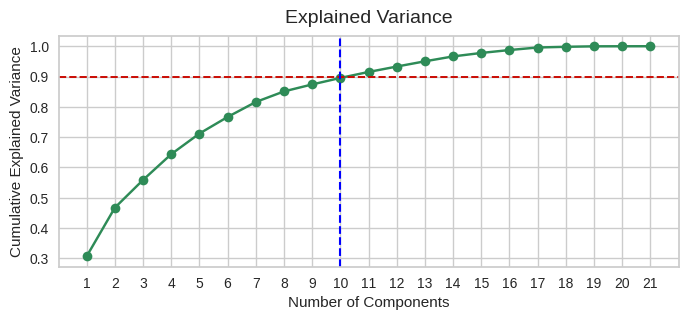

In [ ]:
# Plot of the cumulative variance
PlotExplainedVariance(kept_variance=0.9)    # In this case we decided to mantain 90% of the variance

In [ ]:
# In the above plot we can see that 90% of the variance of the dataset is given by 10 components
pca_components = 10

# Compute the PCA
pca = PCA(n_components=pca_components)
X = pca.fit_transform(df)

# Reconstruct the data
reconstruction = pca.inverse_transform(X)

print(f"N° of PCA components: {len(X[0])}")
print(f"N° of reconstructed features: {len(reconstruction[0])}")

N° of PCA components: 10
N° of reconstructed features: 21


In [ ]:
# Visualize explained variance for each component and the total variance explained by the model
explained_variance = pca.explained_variance_ratio_
for i, ev in enumerate(explained_variance):
    print(f"Explained Variance for Component {i+1}: {ev}")

# Print total sum of Explained Variance
total_variance = sum(explained_variance)
print(f"Total Explained Variance: {total_variance}")

Explained Variance for Component 1: 0.3072738621401387
Explained Variance for Component 2: 0.16016549897374388
Explained Variance for Component 3: 0.09155912578708686
Explained Variance for Component 4: 0.08498095898040571
Explained Variance for Component 5: 0.06798177380493663
Explained Variance for Component 6: 0.054694467003696214
Explained Variance for Component 7: 0.04935495688316141
Explained Variance for Component 8: 0.034915036014793586
Explained Variance for Component 9: 0.023043079578655708
Explained Variance for Component 10: 0.02142005230707938
Total Explained Variance: 0.895388811473698


In [ ]:
# Compute the reconstruction error
reconstruction_error = np.mean((df - reconstruction) ** 2, axis=1)

# Sort and identify anomalies using percentiles and KneeLocator
idxs = np.arange(N).tolist()
combined = list(zip(reconstruction_error, idxs))
sorted_distances = sorted(combined, key=lambda x: x[0])
sorted_scores_PCA, sorted_idxs_PCA = zip(*sorted_distances)

# Identify anomalies using percentiles, the worst 5% is considered anomaly
threshold_perc_PCA = np.percentile(sorted_scores_PCA, 95).astype("float64")

# Identify anomalies using KneeLocator
S = 4  # Sensitivity parameter for knee locator
kneedle = KneeLocator(range(N), sorted_scores_PCA, S=S, curve='convex', direction='increasing')
knee_point = kneedle.elbow
threshold_knee_PCA = np.float64(sorted_scores_PCA[knee_point]) #.astype("float64")

# Saving anomalies
anomalies_perc_PCA = np.where(sorted_scores_PCA > threshold_perc_PCA)[0]
anomalies_knee_PCA = np.where(sorted_scores_PCA > threshold_knee_PCA)[0]

anomalies_idxs_perc_PCA = sorted_idxs_PCA[-len(anomalies_perc_PCA):]
anomalies_idxs_knee_PCA = sorted_idxs_PCA[-len(anomalies_knee_PCA):]

# Array for further evaluations (only here since I will use this model for probabilities)
anomalies_PCA = np.ones(N)
anomalies_PCA[list(anomalies_idxs_knee_PCA)] = -1

print("PCA anomaly scores sample:", np.array(sorted_scores_PCA))
print("\nNumber of anomalies in the top 5%:", len(anomalies_perc_PCA))
print("Number of anomalies detected with KneeLocator:", len(anomalies_knee_PCA))

PCA anomaly scores sample: [2.04906064e-05 2.14382779e-05 2.30817928e-05 ... 9.10172282e-02
 9.10328343e-02 9.47120215e-02]

Number of anomalies in the top 5%: 360
Number of anomalies detected with KneeLocator: 127


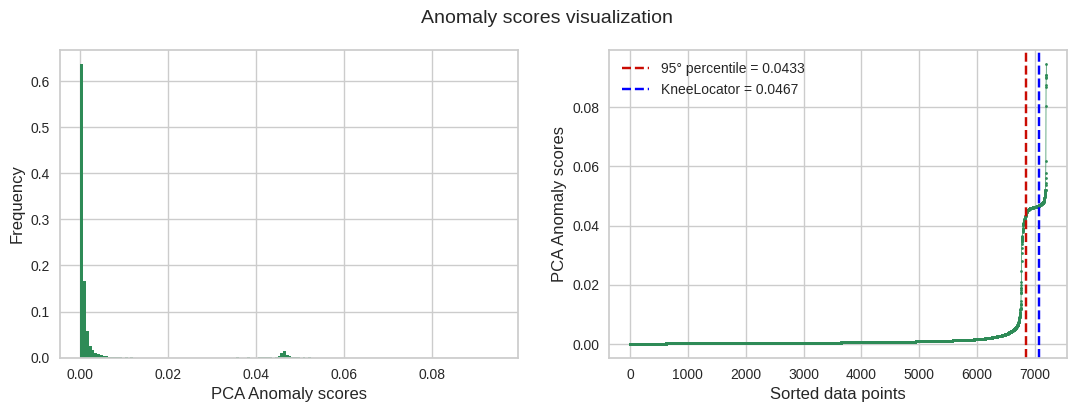

In [ ]:
# Plot anomaly scores
ShowAnomalies(N, sorted_scores_PCA, anomaly_thresholds=[threshold_perc_PCA, threshold_knee_PCA], algorithm='PCA')

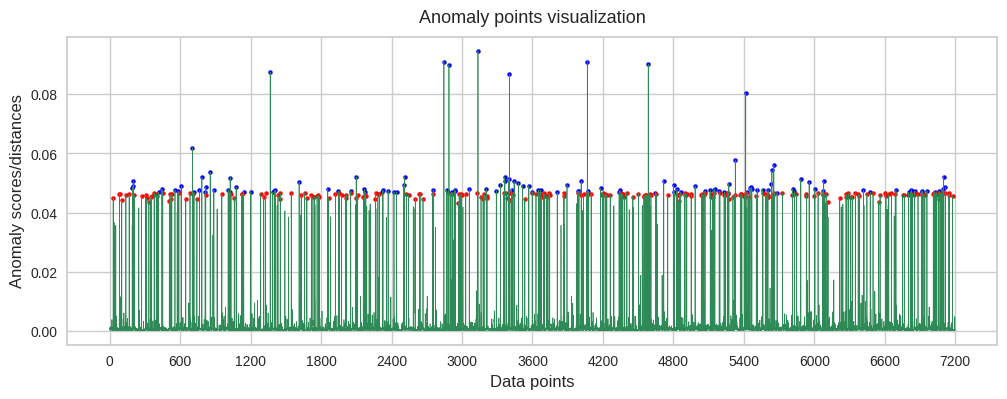

In [ ]:
# Anomalies visualization: blue points correspond to the anomalies identified by the Knee Locator,
# blue + red points = top 5% anomalies
AnomalyPoints(reconstruction_error, list(anomalies_idxs_knee_PCA), list(anomalies_idxs_perc_PCA))

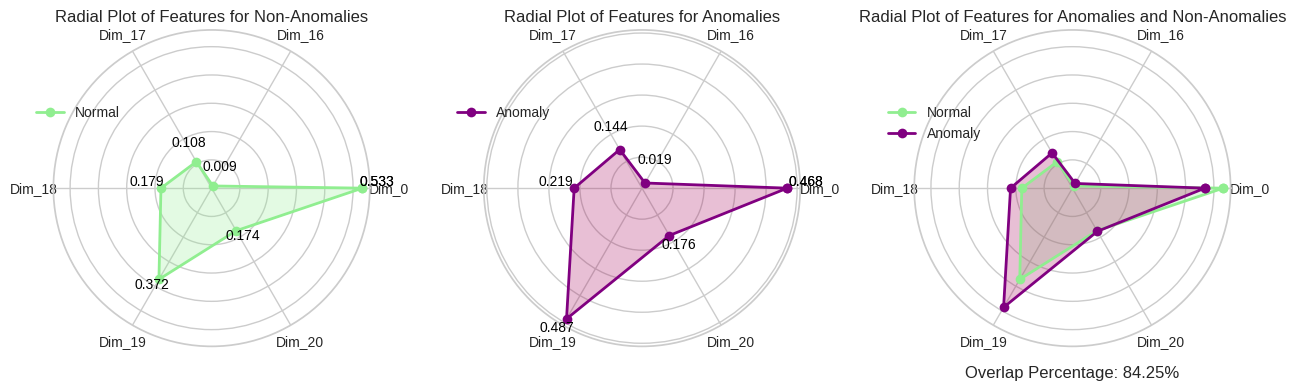

In [ ]:
AnomalyRadialPlots(df, anomalies_idxs_knee_PCA, features=[0, 1, 2, 3, 4, 5])

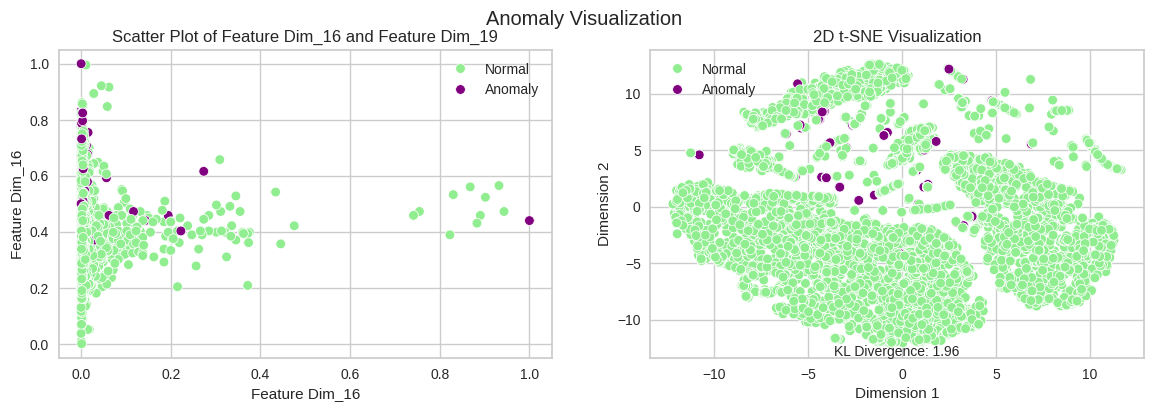

In [ ]:
AnomalyScatterplots(df, N, anomalies_idxs_knee_PCA, feats=[1,4])

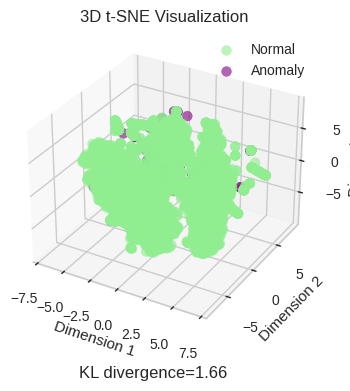

In [ ]:
TSNE3Dscatter_static(df, N, anomalies_idxs_knee_PCA)

In [ ]:
TSNE3Dscatter(df, N, anomalies_idxs_knee_PCA)

In [ ]:
# Save variables for later comparison graph
PCA_perc = np.zeros(7200)
PCA_perc[list(anomalies_idxs_perc_PCA)]=-1

PCA_knee = np.zeros(7200)
PCA_knee[list(anomalies_idxs_knee_PCA)]=-1

### KNN

In [ ]:
# Chose the parameter k
n_neighbors= int(np.sqrt(N))   # Rule of thumb: choose number of neighbors = √n

# Compute KNN
nn = knn(n_neighbors=n_neighbors, algorithm = 'auto').fit(gower_distance_matrix)
distances, indexes = nn.kneighbors(gower_distance_matrix)

In [ ]:
# Find the average distance between each data point and its k neighbors
av_distances=distances.mean(axis=1)
distances_sorted = np.sort(av_distances)
distances_sorted_idx = np.argsort(av_distances)

In [ ]:
# Find the knee point
i = np.arange(N)
knee = KneeLocator(i, distances_sorted, S=1, curve='convex', direction='increasing', interp_method='interp1d')
knee_x = knee.knee
knee_y = knee.knee_y

Number of anomalies in the top 5%: 360
Number of anomalies detected with KneeLocator: 153


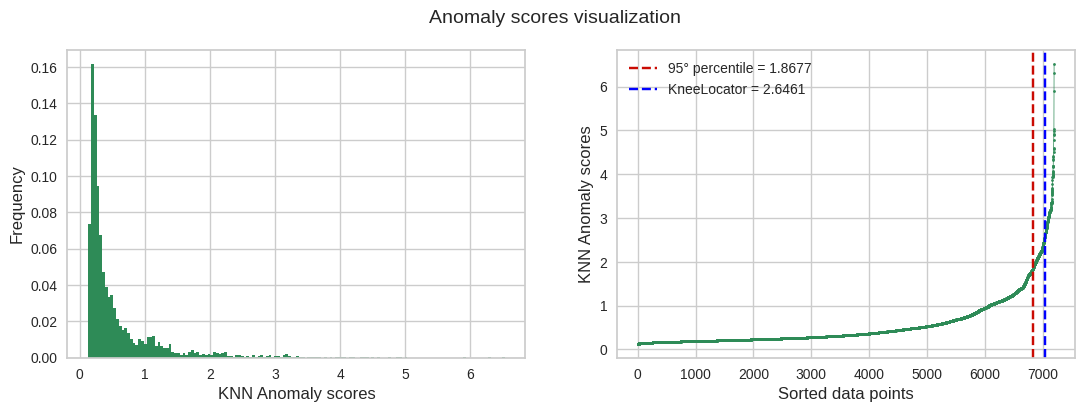

In [ ]:
# Find the two thresholds
threshold_perc_KNN = np.percentile(distances_sorted, 95).astype("float64")
threshold_knee_KNN = np.float64(distances_sorted[knee_x])

# Save 5% anomalies
anomalies_perc_KNN = np.where(distances_sorted > threshold_perc_KNN)[0]
anomalies_idxs_perc_KNN = distances_sorted_idx[-len(anomalies_perc_KNN):]

# Save Knee Locator identified anomalies
anomalies_idxs_knee_KNN = distances_sorted_idx[knee_x:]
anomalies_knee_KNN = df.iloc[anomalies_idxs_knee_KNN]

# Print results
print("Number of anomalies in the top 5%:", len(anomalies_perc_KNN))
print("Number of anomalies detected with KneeLocator:",  len(anomalies_knee_KNN))

# Plot the distances frequency, and the distances for sorted data points
ShowAnomalies(N, distances_sorted, anomaly_thresholds=[threshold_perc_KNN, threshold_knee_KNN], algorithm='KNN')

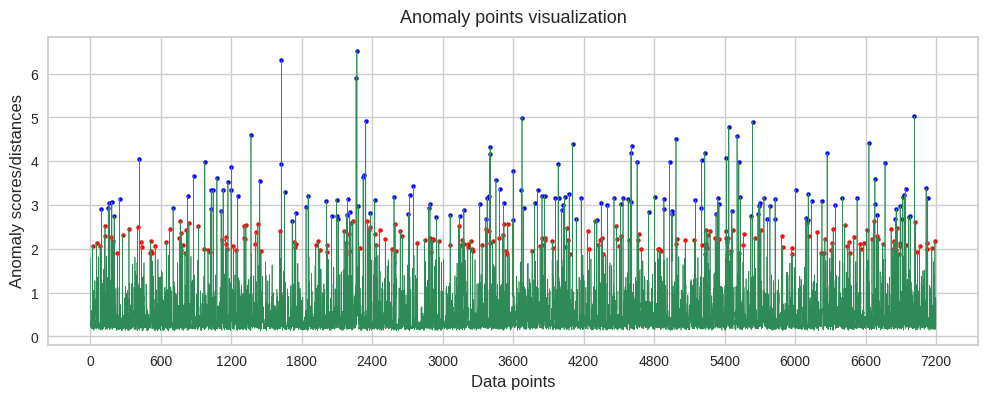

In [ ]:
# Anomalies visualization: blue points correspond to the anomalies identified by the Knee Locator,
# blue + red points = top 5% anomalies
AnomalyPoints(av_distances, anomalies_idxs_knee_KNN, anomalies_idxs_perc_KNN)

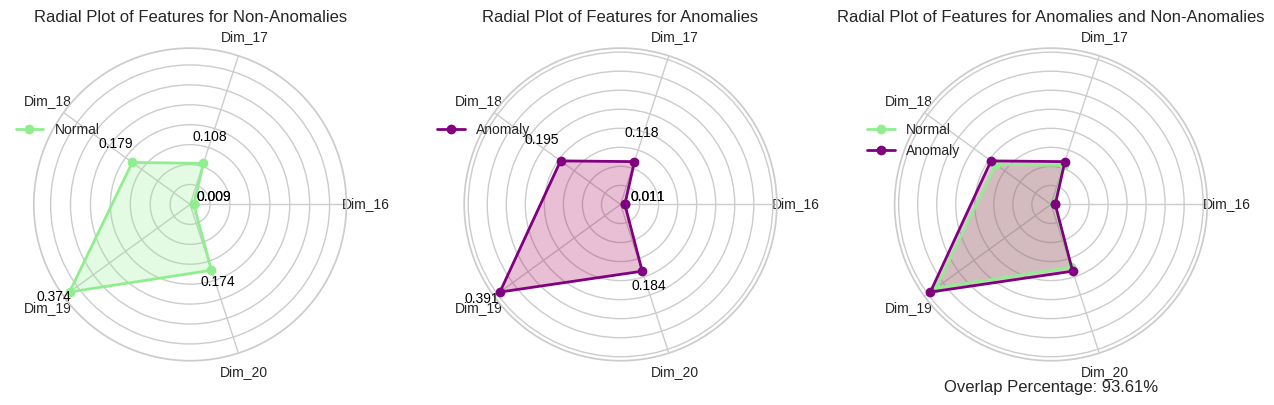

In [ ]:
AnomalyRadialPlots(df, np.array(anomalies_idxs_knee_KNN), features=[1,2,3,4,5])

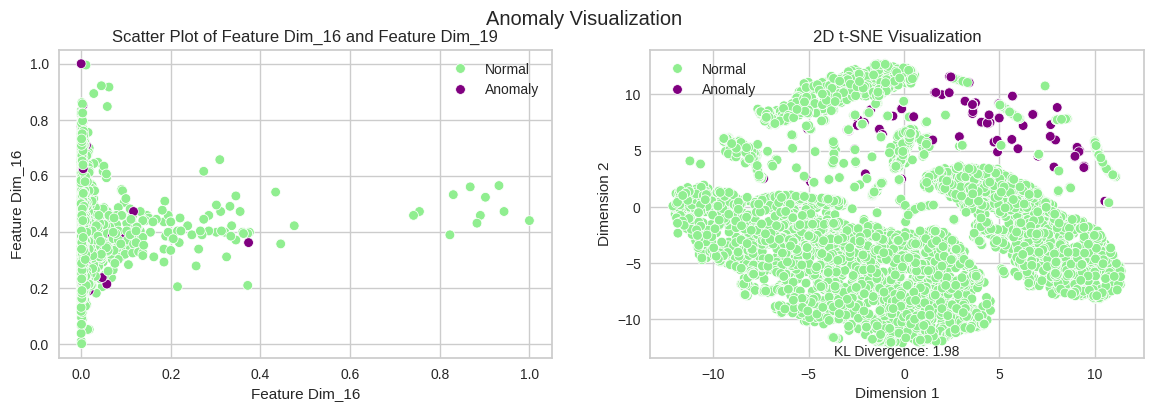

In [ ]:
AnomalyScatterplots(df, N, anomalies_idxs_knee_KNN, feats=[1,4])

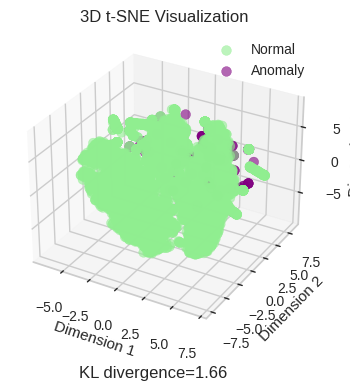

In [ ]:
TSNE3Dscatter_static(df, N, anomalies_idxs_knee_KNN)

In [ ]:
TSNE3Dscatter(df, N, anomalies_idxs_knee_KNN)

In [ ]:
# Save the variable for later comparison
KNN_knee = np.zeros(7200)
KNN_knee[list(anomalies_idxs_knee_KNN)]=-1

KNN_perc = np.zeros(7200)
KNN_perc[list(anomalies_idxs_perc_KNN)]=-1

### DBSCAN

In [ ]:
# Parameters:
# Minimum points: fewest number of points required to form a cluster
# Epsilon: maximum distance two points can be from one another while still belonging to the same cluster

# Rules of thumb in choosing the parameters:
# minPoints >= number of dimensions + 1, often minPoints = 2 * number of dimensions

# Epsilon can be determined by calculating the average distance between each point and its k nearest neighbors, where k = minPts
# The average k distances are plotted in ascendig order (K-distance graph), optimal value of eps is at the maximum curvature

minPts = 2*M      # minPts = 2 * number of features

DB_nn = knn(n_neighbors=minPts)
DB_nn_fit = DB_nn.fit(gower_distance_matrix)
distances_DB, indexes_DB=DB_nn_fit.kneighbors(gower_distance_matrix)

The knee is located at [7178,1.72828]
We chose Epsilon = 1.7282833309659404 rounded to 1.7



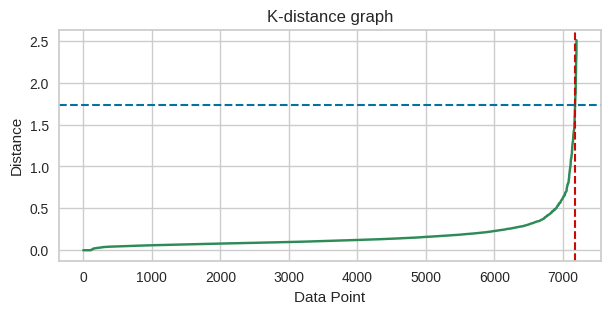

In [ ]:
# Sort the distance values and select the distance from its closest neighbor (second column)
dist_sorted_DB = np.sort(distances_DB,axis=0)
dist_sorted_DB = dist_sorted_DB[:,1]

# Ideal value of epsilon = distance value at the knee point
# Find the knee point
x = np.arange(N)
knee = KneeLocator(x, dist_sorted_DB, S=1, curve='convex', direction='increasing', interp_method='interp1d')
knee_x = knee.knee
knee_y = knee.knee_y

eps = knee_y.round(1)
print(f'The knee is located at [{knee_x},{knee_y.round(5)}]\nWe chose Epsilon = {knee_y} rounded to {eps}\n')

eps = knee_y.round(1)

# Plot the K distance graph with the Knee point
plt.figure(figsize=(7,3))
plt.plot(dist_sorted_DB, color='seagreen')
plt.axvline(x=knee_x, color='r', linestyle='--',linewidth=1.5)
plt.axhline(y=knee_y, color='b', linestyle='--',linewidth=1.5)
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.title('K-distance graph', fontsize=12)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Compute the DBSCAN
dbscan=DBSCAN(eps=eps, min_samples=minPts)
dbscan.fit(gower_distance_matrix)

# In the output labels of DBSCAN, -1 labels correspond to anomalies
DB_labels = dbscan.labels_

anomalies_idxs_DBSCAN = np.where(DB_labels==-1)[0]
anomalies_DBSCAN = df.iloc[anomalies_idxs_DBSCAN]

# Print results
print("Number of anomalies detected with DBSCAN:",  len(anomalies_DBSCAN))

Number of anomalies detected with DBSCAN: 322


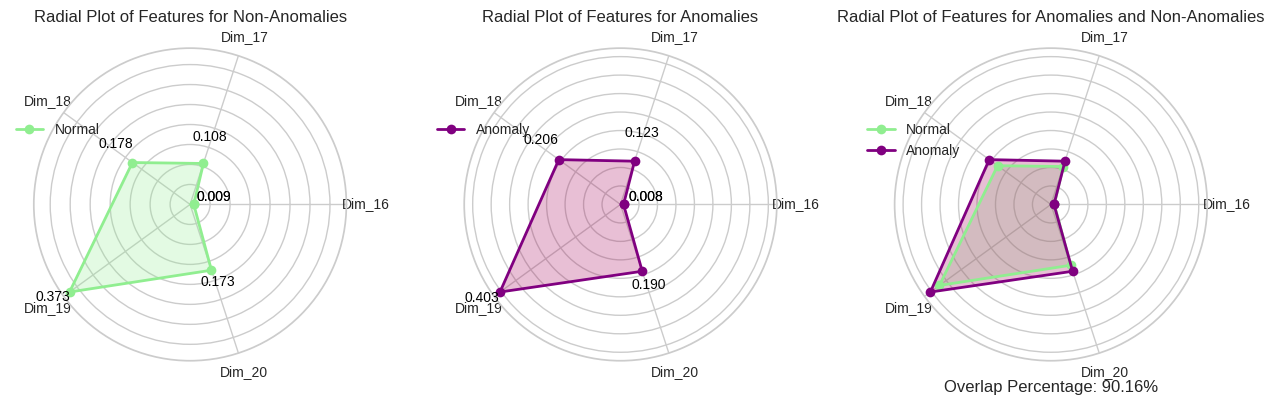

In [ ]:
AnomalyRadialPlots(df, anomalies_idxs_DBSCAN, features=[1,2,3,4,5])

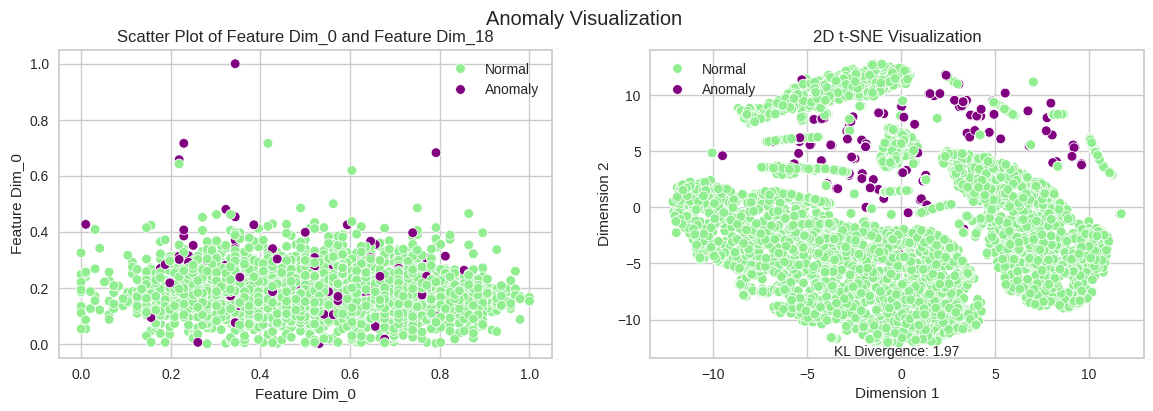

In [ ]:
AnomalyScatterplots(df, N, anomalies_idxs_DBSCAN, feats=[0,3])

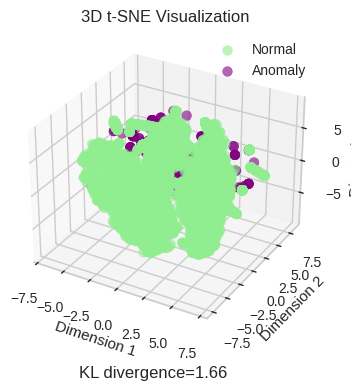

In [ ]:
TSNE3Dscatter_static(df, N, anomalies_idxs_DBSCAN)

In [ ]:
TSNE3Dscatter(df, N, anomalies_idxs_DBSCAN)

In [ ]:
# Save the variable for later comparison
DBSCAN_an = np.zeros(7200)
DBSCAN_an[list(anomalies_idxs_DBSCAN)]=-1

## 📊  Comparison

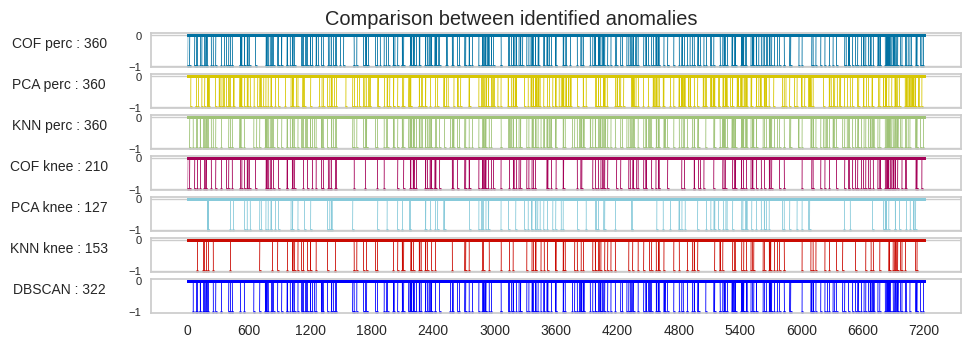

In [ ]:
# Comparison plot

n = 7   # Number of subplots

fig, ax = plt.subplots(n)
fig.suptitle('Comparison between identified anomalies', y=0.86)
fig.set_figheight(n-3)
fig.set_figwidth(9)
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.8, wspace=1, hspace=0.2)

linewidth=0.3
markersize=2
marker='o'

colors=['b','y','g','m','c','r','blue','deeppink', 'darkorange']
methods = [COF_perc, PCA_perc, KNN_perc, COF_knee, PCA_knee, KNN_knee, DBSCAN_an]

for i in range(n):
  ax[i].plot(methods[i], color=colors[i], marker=marker, markersize=markersize, linewidth=linewidth)

# Remove x ticks from in between the subplots
for i in range(n-1):
    ax[i].set_xticks([])
ax[n-1].set_xticks(np.arange(0,N+1,step=600))

# Add titles to each subplot
labels_list=['COF perc', 'PCA perc', 'KNN perc', 'COF knee', 'PCA knee', 'KNN knee', 'DBSCAN']
for i in range(n):
  ax[i].set_ylabel(f'{labels_list[i]} : {np.sum(methods[i]==-1)}', rotation=0, labelpad=50, loc='center', fontsize=10)

# Decrease the dimension of the y-tick labels
for i in range(n):
    ax[i].tick_params(axis='y', labelsize=8)

plt.grid(False)
plt.show()

# Points at y=-1 correspond to the data points identified as anomalies by the different algorithms. Point at 0 are normal points.

As a measure of the dissimilarity between the different results, we chose to compare the lists of anomalies' indexes produced by the different algorithms, by computing the intersection over the union.

In this way, a result of 1.0 means that the intersection of two lists is identical to the union, meaning that the two lists are identical.
A result of 0.0 implies that the lists have no element in common, the anomalies identified by one method are all different from the ones given by another method.

In [ ]:
# Function used to plot a lower triangulat matrix
def plot_triangular_matrix(matrix, labels):
  mask = np.triu(np.ones_like(matrix))
  cmap = sns.light_palette('seagreen')
  sns.heatmap(matrix, mask=mask, annot=True, fmt=".3g", annot_kws={"size":10},cmap=cmap)
  plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontsize=9, horizontalalignment='left', verticalalignment='top')
  plt.yticks(ticks=np.arange(len(labels)), labels=labels, fontsize=9, horizontalalignment='right', verticalalignment='top')

In [ ]:
# Function which measures the intersection over the union for each pair of methods and returns a matrix
def compare(methods, labels):
    n = len(methods)
    values_iou = np.zeros((n, n), dtype=float)

    for i in range(n):
        set1 = set(np.array(methods[i]))
        for j in range(n):
            set2 = set(np.array(methods[j]))

            # Find intersection
            common_elements = set1.intersection(set2)
            len_intersection = len(common_elements)

            # Find union
            union_elements = set1.union(set2)
            len_union = len(union_elements)

            values_iou[i][j] = len_intersection / len_union
    # Return the matrix
    return values_iou

In [ ]:
methods_knee = [anomalies_idxs_knee_COF,  anomalies_idxs_knee_PCA, anomalies_idxs_knee_KNN, anomalies_idxs_DBSCAN]
methods_perc = [anomalies_idxs_perc_COF,  anomalies_idxs_perc_PCA, anomalies_idxs_perc_KNN, anomalies_idxs_DBSCAN]
labels = ['COF', 'PCA', 'KNN', 'DBSCAN']

# Matrices given as output  of the function compare, containing the values of intersection over union.
comp_knee = compare(methods_knee, labels)     # Comparison between the knee identified anomalies (and dbscan)
comp_perc = compare(methods_perc, labels)     # Comparison between the percentage identified anomalies (and dbscan)

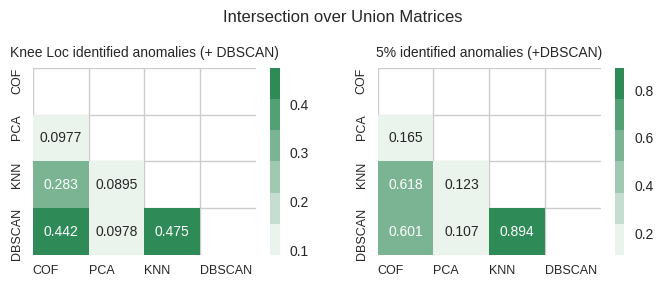

In [ ]:
fig_iou = plt.figure(figsize=(7, 3))
plt.suptitle('Intersection over Union Matrices', y=0.95, fontsize=12)

# Create subplots
ax1 = fig_iou.add_subplot(121)
ax2 = fig_iou.add_subplot(122)

# Plot comparison matrix of knee methods on ax1
plt.sca(ax1)
plt.title('Knee Loc identified anomalies (+ DBSCAN)', y=1.01, fontsize=10)
plot_triangular_matrix(comp_knee, labels)

# Plot comparison matrix of percentage methods on ax2
plt.sca(ax2)
plt.title('5% identified anomalies (+DBSCAN)', y=1.01, fontsize=10)
plot_triangular_matrix(comp_perc, labels)

plt.subplots_adjust(wspace=1.6)
plt.tight_layout()

plt.show()

We can observe that the top 5% anomalies identified by KNN  and the anomalies given by DBSCAN are quite similar.
Also the 5% anomalies of COF and KNN.


## ❓  Conversion to Anomaly probability

Out of the four used Anomaly detection techniques, we decided to submit the anomaly scores percentage obtained in PCA by the Knee Locator, since it is one of the algorithms which showed the lowest overlapping percentage in the Radial Graph.

In [ ]:
df_copy = df.copy()  # Create a copy of the df to not modify the original

# Add the Label for the Anomalies (1)
df_copy["Label"] = anomalies_PCA
print(f"N° of anomalies: {list(df_copy['Label'].value_counts())[1]}")

X = df_copy.drop(columns=['Label'])
y = df_copy['Label']

# Initialize and train the model
model = LogisticRegression()
model.fit(X, y)

# Extract the probabilities for the points to be anomalies
prob = model.predict_proba(X)[:, 0]

# Add probability percentages column to the dataframe
df_copy["Probability percentage of being anomaly point"] = np.round(prob * 100, 2)


N° of anomalies: 127


In [ ]:
df_copy['Label'].value_counts()

Label
 1.0    7073
-1.0     127
Name: count, dtype: int64

In [ ]:
df_copy.sample(10)

Dim_0    Dim_16    Dim_17    Dim_18    Dim_19    Dim_20  Dim_1=0  \
3911  0.406250  0.001189  0.109192  0.120401  0.379630  0.114063     True   
4973  0.531250  0.014528  0.142061  0.091973  0.356481  0.092187    False   
6148  0.229167  0.006038  0.109192  0.157191  0.365741  0.153125     True   
1898  0.875000  0.006226  0.125348  0.197324  0.365741  0.193750     True   
3208  0.250000  0.005660  0.113092  0.152174  0.388889  0.140625     True   
5843  0.812500  0.004377  0.109192  0.186104  0.365741  0.180875     True   
4673  0.760417  0.002264  0.109192  0.202341  0.458333  0.159375     True   
4333  0.614583  0.001226  0.109192  0.187291  0.361111  0.184375    False   
5916  0.395833  0.001528  0.113092  0.192308  0.365741  0.187500     True   
2651  0.427083  0.009811  0.075209  0.093645  0.305556  0.104688     True   

      Dim_2=0  Dim_3=0  Dim_4=0  ...  Dim_8=0  Dim_9=0  Dim_10=0  Dim_11=0  \
3911     True     True     True  ...     True     True      True      True   
4973     True     True     True  ...     True     True      True      True   
6148     True     True     True  ...     True     True      True      True   
1898     True     True     True  ...     True     True      True      True   
3208     True     True     True  ...     True    False      True      True   
5843     True     True     True  ...     True     True      True      True   
4673     True     True     True  ...     True     True      True      True   
4333     True     True     True  ...    False     True      True      True   
5916     True     True     True  ...     True     True      True      True   
2651     True     True     True  ...     True     True      True      True   

      Dim_12=0  Dim_13=0  Dim_14=0  Dim_15=0  Label  \
3911      True      True      True      True    1.0   
4973      True      True      True      True    1.0   
6148      True      True      True      True    1.0   
1898      True      True      True      True    1.0   
3208      True      True      True      True    1.0   
5843      True      True      True      True    1.0   
4673      True      True      True      True    1.0   
4333      True      True      True      True    1.0   
5916      True      True      True      True    1.0   
2651      True      True      True      True    1.0   

      Probability percentage of being anomaly point  
3911                                           0.30  
4973                                           0.28  
6148                                           0.27  
1898                                           0.56  
3208                                           0.33  
5843                                           0.50  
4673                                           0.63  
4333                                           0.41  
5916                                           0.34  
2651                                           0.22  

[10 rows x 23 columns]

In [ ]:
# Export as file csv
#df_copy.to_csv('df_anomaly_probability.csv', index=False)

# Download
#files.download('df_anomaly_probability.csv')

# If re-uploaded on Colab:
# df_probabilities= pd.read_csv("df_anomaly_probability.csv")